# Introducción

Insideairbnb.com es un sitio web en el que se publican conjuntos de datos extraídos de la web de "instantáneas" de ciudades. Hemos descargado los archivos de Roma de la situación del 7 de junio de 2022 desde [este enlace](http://insideairbnb.com/get-the-data). Pensamos que es un conjunto de datos interesante para trabajar. Además de la disputa de datos básicos y las tramas, también hemos agregado mapas interactivos de Folium, gráficos interactivos de tramas y extracción de texto de los comentarios de revisión.

# Variables

- name : Nombre de listado.
- host_id : Id del propietario.
- host_name : Nombre del propietario.
- neighbourhood : Barrio.
- latitude : Latitud (Coordinadas).
- longitude : Longitud (Coordenadas).
- room_type : Tipo de alojamiento.
- price : Precio por noche.
- minimum_nights : Mínimo de noches de alquiler.
- number_of_reviews : Número de reseñas del anuncio.
- last_review : Última reseña del anuncio.
- reviews_per_month : Reseñas mensuales.
- calculated_host_listings_count : Cantidad de listados de cada propietario.
- availability_365 : Cantidad de dias disponible en el año.
- number_of_reviews_ltm : Número de reseñas en el último mes.
- property_type : Descripción del tipo de alojamiento.
- accommodates : Número de personas máximas para cada alojamiento.
- bedrooms : Cantidad de habitaciones disponibles en alojamiento.
- beds : Cantidad de camas disponibles en cada alojamiento.
- first_review : Fecha de primera reseña.
- review_scores_value : Valoración del alojamiento. Sobre 10.
- review_scores_cleanliness : Valoración de limpieza. Sobre 10.
- review_scores_location : Valoración de localización. Sobre 10.
- review_scores_accuracy : Valoracón de exactitud de las reseñas. Sobre 10.
- review_scores_communication : Valoración de comunicación/transporte. Sobre 10.
- review_scores_checkin : Valoración del checkin. Sobre 10.
- review_scores_rating : Valoración global de las reseñas. Sobre 10.
- maximum_nights : Máximo de noches de alquiler.
- listing_url : url del anuncion de Airbnb.
- host_is_superhost : Si el propietario es superhost o no (True/False)
- host_about : Descripción acerca del propietario.
- host_response_time : Tiempo que tarda en responder el propietario.
- host_response_rate : Porcentaje de respuesta del propietario.

# Importanos las librerias

In [ ]:
!pip install geopandas
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

# 1. Importando módulos y datos

In [ ]:
from nltk.corpus.reader import reviews
# Creamos carpeta
!mkdir input/
# Descargar archivo listings_details.csv
!wget http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/data/listings.csv.gz -P input/ \
    && gunzip input/listings.csv \
    && mv input/listings.csv input/listings_details.csv
# Descargar archivo reviews_details.csv
!wget http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/data/reviews.csv.gz -P input/ \
    && gunzip input/reviews.csv \
    && mv input/reviews.csv input/reviews_details.csv
# Descargar archivo calendar.csv
!wget http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/data/calendar.csv.gz -P input/ \
    && gunzip input/calendar.csv \
    && mv input/calendar.csv input/calendar.csv
# Descargar archivo listings.csv
!wget http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/visualisations/listings.csv -P input/ \
    && gunzip input/listings.csv \
    && mv input/listings.csv input/listings.csv
# Descargar archivo reviews.csv
!wget http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/visualisations/reviews.csv -P input/ \
    && gunzip input/reviews.csv \
    && mv input/reviews.csv input/reviews.csv
# Descargar archivo neighbourhoods.csv
!wget http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/visualisations/neighbourhoods.csv -P input/ \
    && gunzip input/neighbourhoods.csv \
    && mv input/neighbourhoods.csv input/neighbourhoods.csv
    # Descargar archivo neighbourhoods.geojson
!wget http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/visualisations/neighbourhoods.geojson -P input/ \
    && gunzip input/neighbourhoods.geojson



--2022-07-01 07:54:08--  http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 52.216.169.154
Connecting to data.insideairbnb.com (data.insideairbnb.com)|52.216.169.154|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16471925 (16M) [application/x-gzip]
Saving to: ‘input/listings.csv.gz’

listings.csv.gz     100%[===================>]  15.71M  45.1MB/s    in 0.3s    

2022-07-01 07:54:09 (45.1 MB/s) - ‘input/listings.csv.gz’ saved [16471925/16471925]

--2022-07-01 07:54:10--  http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/data/reviews.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 52.216.169.154
Connecting to data.insideairbnb.com (data.insideairbnb.com)|52.216.169.154|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162525631 (155M) [application/x-gzip]
Saving to: ‘input/reviews.csv.gz’

reviews.csv.gz      100%[===============

## 1.1 Detalles del listado de viviendas

El conjunto de datos contiene un total de 7 archivos. El archivo de listados es un archivo de descripción general que las etiquetas internas de airbnb como "bueno para visualizaciones". El identificador único en el conjunto de datos es la identificación de "listings". Esta es básicamente la identificación del anuncio. En general, había 23911 listados de Airbnb en Roma el 7 de junio de 2022.

In [ ]:
print(os.listdir("input"))

['neighbourhoods.geojson', 'calendar.csv', 'reviews.csv', 'reviews_details.csv', 'listings_details.csv', 'listings.csv', 'neighbourhoods.csv']


Creamos nuestros DataFrames, haciendo que el índice sea la variable `id`. 

In [ ]:
listings = pd.read_csv("input/listings.csv", index_col= "id")
listings_details = pd.read_csv("input/listings_details.csv", index_col= "id")

calendar = pd.read_csv("input/calendar.csv", parse_dates=['date'], index_col=['listing_id'])
reviews_details = pd.read_csv("input/reviews_details.csv", parse_dates=['date'])

pd.set_option('display.max_columns', 100)

El archivo de listados contiene 17 variables por listado además del id.

In [ ]:
print(listings.shape)

(23911, 17)


In [ ]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
listings_details.shape

(23911, 73)

In [ ]:
listings_details.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

El archivo listados_detalles contiene un total de 73 variables. No vamos a usar todos estos, sino que juntaremos selectivamente una serie de variables que parecen útiles para este EDA.

In [ ]:
target_columns = ["property_type", "accommodates","bedrooms","beds","first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate"]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23911 entries, 49955080 to 28794819
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            23908 non-null  object 
 1   host_id                         23911 non-null  int64  
 2   host_name                       23906 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   23911 non-null  object 
 5   latitude                        23911 non-null  float64
 6   longitude                       23911 non-null  float64
 7   room_type                       23911 non-null  object 
 8   price                           23911 non-null  int64  
 9   minimum_nights                  23911 non-null  int64  
 10  number_of_reviews               23911 non-null  int64  
 11  last_review                     19970 non-null  object 
 12  reviews_per_month     

## 1.2. Limpieza de datos

Vamos a proceder a la limpieza de nuestras variables eliminando valores `NaN de algunas de ellas y cambiando el formato de algunas otras. 

Calculamos el porcentaje de valores faltantes para nuestras variables

In [ ]:
valores_faltantes = listings.isnull().sum().sort_values(ascending = False).values
pje_faltantes = listings.isnull().sum().sort_values(ascending = False).values / listings.shape[0] *100
columnas = listings.isnull().sum().sort_values(ascending = False).index

pd.DataFrame(data = {'FALTANTES':valores_faltantes,'PJE_FALTANTES':[round(x,2) for x in pje_faltantes]},index = columnas)

,FALTANTES,PJE_FALTANTES
neighbourhood_group,23911,100.00
license,20387,85.26
host_about,10568,44.20
review_scores_value,4067,17.01
review_scores_location,4066,17.00
review_scores_checkin,4062,16.99
review_scores_accuracy,4061,16.98
review_scores_communication,4060,16.98
review_scores_cleanliness,4060,16.98
first_review,3941,16.48


Vemos que el `neighbourhood_group` es inútil en Roma ya que contiene todo objetos nulos. A continuación, nos deshacemos de esta variable.

In [ ]:
listings = listings.drop(columns=['neighbourhood_group'])

Vamos a eliminar la variable `license` debido a que tiene un porcentaje de valores nulos superior al 85%

In [ ]:
listings.drop(columns=['license'], inplace=True)

En la variable `host_response_rate` vamos a eliminar el simbolo `%` y la transformamos a `float`

In [ ]:
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))

En la variable `maximum_nights` observamos que el valor que más se repite es `1125`. Este valor tan raro, es el asignado automaticamente por la plataforma Airbnb en caso de que no se le asigne ninguno por parte del propietario. https://community.withairbnb.com/t5/Hosting/Listing-not-shown-under-Family-and-Work-Collection-whilst/td-p/809836

Será por ello que decidiremos cambiarlo por el valor, `365`, que hace referencia a un año natural.

In [ ]:
listings['maximum_nights'].value_counts().head(5)

1125    10350
30       3023
365      2449
28       1283
29       1182
Name: maximum_nights, dtype: int64

In [ ]:
listings['maximum_nights'] = listings['maximum_nights'].replace([1125],365)

Vamos a transformas las variables 'review_scores_value', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 'review_scores_rating' a formato `int` para poder trabajar con ellas de manera mas eficiente a la hora de hacer gráficas. A su vez tranformaremos los valores, multiplicandolos por `2`para hacer que las notas sean sobre 10.

Pero antes de eso rellenaremos sus valores `NaN` con la media de sus columnas.

In [ ]:
listings['review_scores_value'].fillna(listings['review_scores_value'].mean(), inplace=True)
listings['review_scores_cleanliness'].fillna(listings['review_scores_cleanliness'].mean(), inplace=True)
listings['review_scores_location'].fillna(listings['review_scores_location'].mean(), inplace=True)
listings['review_scores_accuracy'].fillna(listings['review_scores_accuracy'].mean(), inplace=True)
listings['review_scores_communication'].fillna(listings['review_scores_communication'].mean(), inplace=True)
listings['review_scores_checkin'].fillna(listings['review_scores_checkin'].mean(), inplace=True)
listings['review_scores_rating'].fillna(listings['review_scores_rating'].mean(), inplace=True)

In [ ]:
listings['review_scores_value'] = listings['review_scores_value'].apply(lambda x: x*2)
listings['review_scores_cleanliness'] = listings['review_scores_cleanliness'].apply(lambda x: x*2)
listings['review_scores_location'] = listings['review_scores_location'].apply(lambda x: x*2)
listings['review_scores_accuracy'] = listings['review_scores_accuracy'].apply(lambda x: x*2)
listings['review_scores_communication'] = listings['review_scores_communication'].apply(lambda x: x*2)
listings['review_scores_checkin'] = listings['review_scores_checkin'].apply(lambda x: x*2)
listings['review_scores_rating'] = listings['review_scores_rating'].apply(lambda x: x*2)

In [ ]:
listings['review_scores_value'] = listings['review_scores_value'].astype(int)
listings['review_scores_cleanliness'] = listings['review_scores_cleanliness'].astype(int)
listings['review_scores_location'] = listings['review_scores_location'].astype(int)
listings['review_scores_accuracy'] = listings['review_scores_accuracy'].astype(int)
listings['review_scores_communication'] = listings['review_scores_communication'].astype(int)
listings['review_scores_checkin'] = listings['review_scores_checkin'].astype(int)
listings['review_scores_rating'] = listings['review_scores_rating'].astype(int)

Mostramos el encabezado del marco de datos con el que vamos a trabajar.

In [ ]:
listings.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,property_type,accommodates,bedrooms,beds,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49955080,Singola al Casale di Gardenia,396326393,Alessia,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,Private room in nature lodge,1,1.0,1.0,NaN,9,9,9,9,9,9,9,29,https://www.airbnb.com/rooms/49955080,f,NaN,a few days or more,0.0
41146116,Il Giardino di Veio,322089651,Rosetta,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,Private room in home,4,1.0,3.0,2020-01-26,9,9,9,9,9,9,0,365,https://www.airbnb.com/rooms/41146116,f,"Sono Rosi, ho 54 anni sono una mamma e una mog...",a few days or more,0.0
39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,Room in hotel,2,1.0,1.0,NaN,9,9,9,9,9,9,9,7,https://www.airbnb.com/rooms/39624404,f,NaN,NaN,NaN
1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,Entire rental unit,3,1.0,2.0,2015-07-12,9,10,9,9,10,9,9,14,https://www.airbnb.com/rooms/1903817,t,"I am born in Norway, but I have lived in Italy...",within an hour,100.0
17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,Private room in bed and breakfast,2,1.0,2.0,2017-03-24,9,10,9,10,10,10,10,15,https://www.airbnb.com/rooms/17617868,f,Sono Emanuele e sono il tipico ragazzo della p...,within an hour,100.0


# 2. Análisis exploratorio
## 2.1 Vecindario

In [ ]:
listings['room_type'].value_counts().unique

<bound method Series.unique of Entire home/apt    15816
Private room        7122
Hotel room           823
Shared room          150
Name: room_type, dtype: int64>

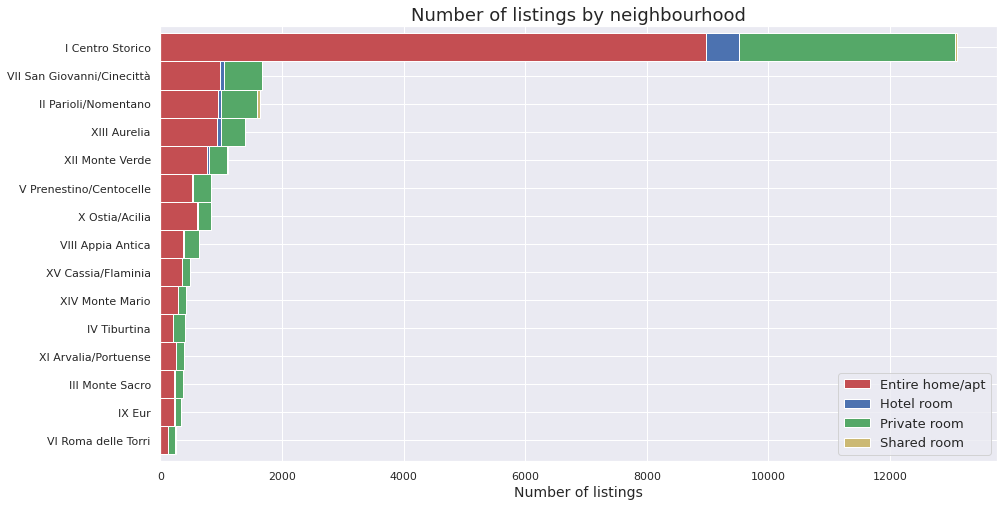

In [ ]:
prop = listings.groupby(['neighbourhood','room_type']).room_type.count()
prop = prop.unstack() 
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=30]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g","y"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Number of listings by neighbourhood', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

A continuación, se puede ver que la mayoría de los listados se encuentran en el centro histórico de la ciudad y alrededores de la Ciudad del Vaticano, siendo estas las zonas de mayor concentración turística. Que la zona del centro histórico tenga la mayoria de listados referentes a hoteles, da muestra de que se trata de la zona con mayor interés turístico al ser la más cercana a monumentos, museos, yacimientos...

Este mapa es interactivo y puede ampliar los grupos para encontrar las ubicaciones individuales de los listados.



In [ ]:
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[41.88758298378406, 12.471454167141323], zoom_start=10.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

## 2.2 Tipos de propiedades y habitaciones

### 2.2.1 Tipos de propiedades

En el caso de Roma por tratarse de una ciudad tan turística, prácticamente la mitad de los listados son pisos y habitaciones de alquiler en el centro de la ciudad, y la mayoría de ellas no vive nadie de manera permanente. Esto nos da muestra de que se trata en la mayoria de casos de pisos 'turísticos'. Esto ha generado grán cantidad de problemas en la ciudad debido al encarecimiento de los alquileres para los residentes en la zona. Este mismo problema lo observamos en el resto de grandes ciudades europeas.

En el caso de `Private room` encontramos que se trata mayoritariamente de habitaciones de hostales o pensiones.

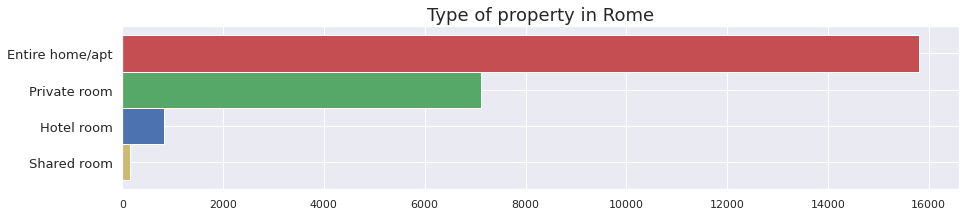

In [ ]:
freq = listings['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["y","b","g","r"])
plt.title('Type of property in Rome', fontsize=18)
plt.show()

####  2.2.1.1 Subtipos de propiedades

En el conjunto de datos, encontramos muchos tipos de propiedades diferentes.

In [ ]:
listings.property_type.unique()

array(['Private room in nature lodge', 'Private room in home',
       'Room in hotel', 'Entire rental unit',
       'Private room in bed and breakfast', 'Entire serviced apartment',
       'Entire villa', 'Entire guesthouse', 'Entire condo',
       'Private room in guest suite', 'Private room in condo',
       'Private room in rental unit', 'Tiny home', 'Entire home',
       'Private room in villa', 'Entire loft', 'Entire guest suite',
       'Entire bungalow', 'Entire vacation home', 'Camper/RV',
       'Private room in houseboat', 'Farm stay',
       'Room in bed and breakfast', 'Entire townhouse',
       'Room in serviced apartment', 'Boat', 'Private room',
       'Private room in guesthouse', 'Private room in loft',
       'Private room in serviced apartment', 'Room in boutique hotel',
       'Entire cottage', 'Shared room in rental unit',
       'Private room in vacation home', 'Entire cabin',
       'Private room in boat', 'Shared room in hostel',
       'Private room in farm sta

Sin embargo, muchos de esos tipos de propiedades tienen muy pocos listados en Roma. En la figura a continuación, solo mostramos tipos de propiedades con al menos 100 listados. Como podemos ver, la gran mayoría de las propiedades en Roma son apartamentos.

Llama la atencion de la cantidad de 'bed and breakfast', siendo el cuarto tipo por cantidad. Esto se podría deber a la exención de firma de contrato a la que están sujetos, al tratarlo con un negocio, aunque llevara aparejado unos impuestos mayores. 

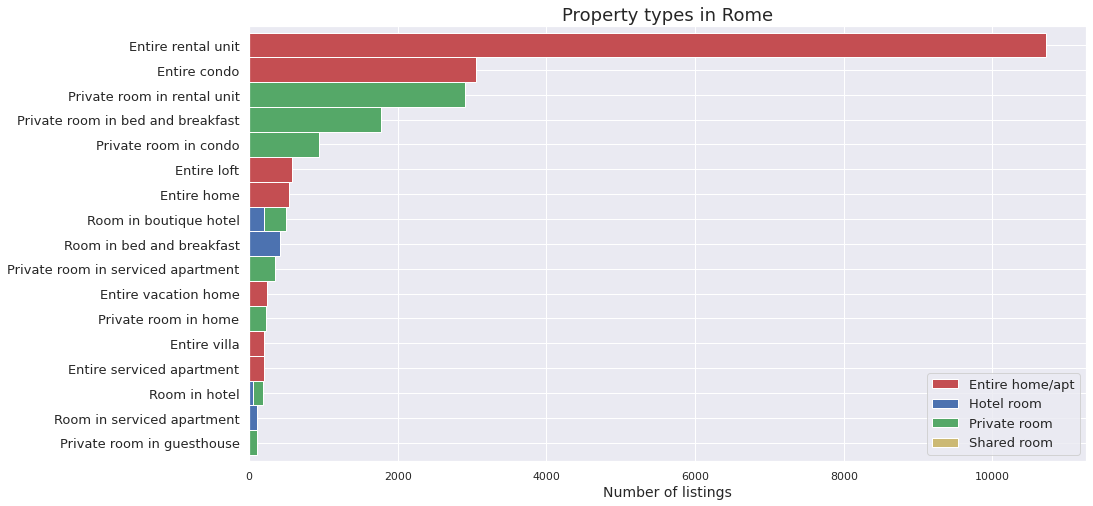

In [ ]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack() 
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g","y"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Rome', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

### 2.2.2 Habitaciones por propiedad

Como acabamos de ver en el tipo de habitaciones, observamos que la mayoria de alojamientos se tratan de 1 ó 2 habitaciones, siendo lógico en una ciudad tan antigua como Roma donde el espacio es tan reducido y caro. Tambien tiene sentido que los hoteles, habitaciones privadas y compartidas solo tengan 1 habitación. A su vez da muestra del tipo de propiedades en alquiler, al tratarse su mayoria de pequeños apartamentos y habitaciones. 

In [ ]:
listings.bedrooms.unique()

array([ 1.,  2.,  4., nan,  3.,  6.,  5., 10., 11., 14.,  7.,  9.,  8.,
       15., 12., 16., 21.])

En la figura a continuación, solo mostramos tipos de habitaciones con al menos 30 listados. 

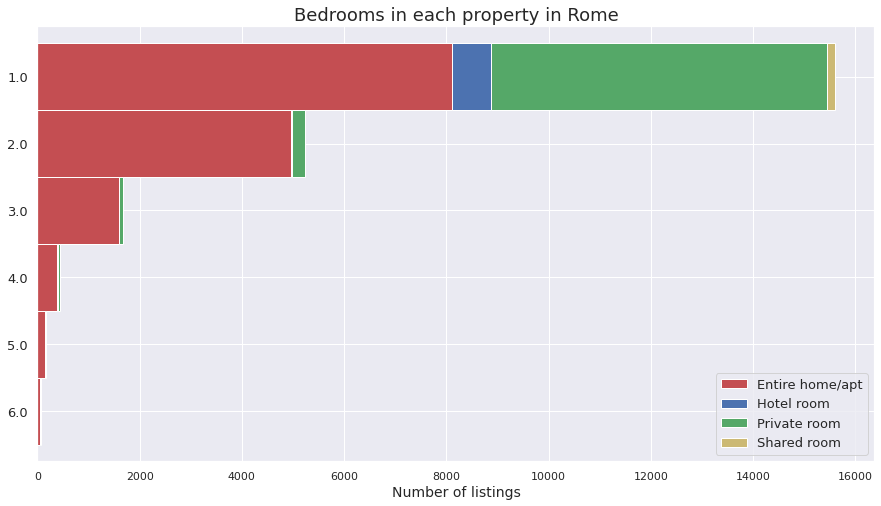

In [ ]:
prop = listings.groupby(['bedrooms','room_type']).room_type.count()
prop = prop.unstack() 
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=30]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g","y"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Bedrooms in each property in Rome', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

### 2.2.3 Camas en cada propiedad

Estos datos de la cantidad de camas nos dan a entender, junto a a la cantidad de alojados por listado que en la mayoria de casos esa única cama será de matrimonio.

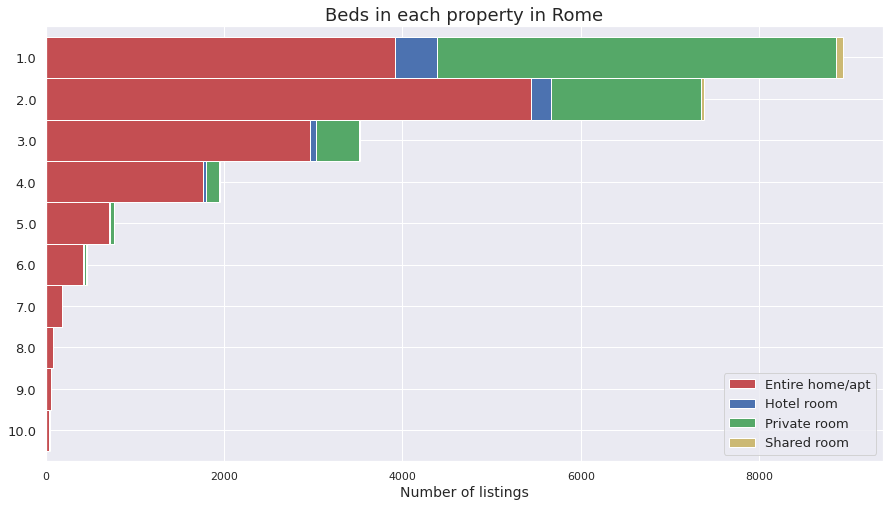

In [ ]:
prop = listings.groupby(['beds','room_type']).room_type.count()
prop = prop.unstack() 
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=50]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g","y"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Beds in each property in Rome', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

## 2.3 Número de alojados

Como era de esperar, tanto por el tipo de habitaciones como por el tipo de camas predominantes, la mayoría de los listados son para 2 personas. Además, Airbnb utiliza un máximo de 16 huéspedes por anuncio.

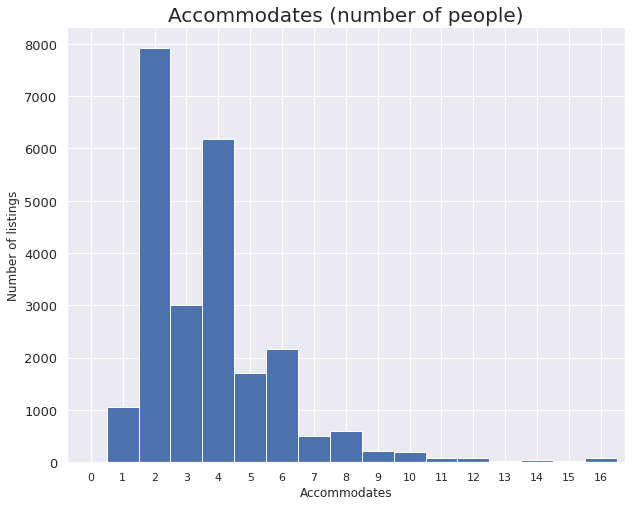

In [ ]:
feq=listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

## 3. Analítica al servicio del gobierno

Para intentar controlar el auge de los alquileres turísticos en Italia, cualquier persona que quiera publicitar un alquiler en internet es necesario que solicite acceso a Allogati Web en la jefatura de la policia local.

Al hospedar a turistas o invitados extranjeros, los anfitriones en Italia deben recopilar la información de identificación de sus invitados, incluida una imagen de su pasaporte o identificación nacional en el momento del check-in. Esta información, incluidas las imágenes de los pasaportes de los huéspedes o la identificación nacional, debe enviarse al portal web de la policía estatal. 

Para alquileres de menos de 30 días por parte de anfitriones que no operan como o en el lugar de un negocio, los anfitriones deberán preparar un contrato de alquiler a corto plazo por escrito para que el huésped lo firme al momento del check-in. Al reservar los huéspedes a través de Airbnb, Booking.com u otras plataformas de alquiler a corto plazo, aún es necesario un contrato por escrito y firmado entre el anfitrión y el huésped. Este contrato no está sujeto al registro de la oficina de impuestos a menos que los huéspedes se queden por más de 30 días. Tenga en cuenta que solo es necesario un contrato si su alquiler de corta duración se enmarca en la categoría de “apartamento turístico amueblado”, y si su alquiler de corta duración se encuadra en cualquier otra categoría, incluso alojamiento y desayuno, no hay necesidad de un contrato escrito.

Si tienes propiedades en Roma, debes registrarlas en internet en el sitio web de SUAR. Obtendrás un código CIR que deberás subir aquí para que el gobierno pueda hacer un seguimiento del número de turistas que recibes. Como en Francia, debes incluirlo cuando promociones tus alquileres en internet ya que, de lo contrario, las multas van desde los €500 a los €5000.

Roma no tiene un acuerdo con Airbnb con respecto a la recaudación de impuestos, lo que significa que los anfitriones deberán recaudar y pagar el impuesto turístico de la ciudad por su cuenta. La tasa turística de Roma es de 3,50 € por persona y noche, que solo se paga hasta diez noches. Los niños menores de 10 años están exentos del impuesto. Son los anfitriones quienes deben remitir la tasa turística a la ciudad de Roma cada trimestre. 

Si está operando su alquiler a corto plazo como un anfitrión no profesional, probablemente utilizará el régimen fiscal de Cedolare Secca. Este régimen fiscal solo está disponible para los anfitriones no profesionales que se consideran “personas físicas” que alquilan sus propiedades. El Cedolare Secca es una tasa fija preferencial del 21% aplicada exclusivamente a los ingresos generados por su alquiler a corto plazo. Tenga en cuenta que el régimen fiscal de Cedolare Secca no permite la deducción de ningún gasto. Actualmente hay una disputa judicial en curso entre Airbnb y el gobierno italiano con respecto a la obligación de incluir y cargar automáticamente el Cedolare Secca a través de su plataforma de reservas en línea. Actualmente, la plataforma de Airbnb no recauda este impuesto.

### 3.1. Disponibilidad máxima de noches

Observamos que la mayoria de listados estan disponibles para arquilar todo el año. Lo que da muestra de que se trata de alojamientos con caracter comercial, tales como casas turisticas, hostales, hoteles,...

Debido a las regulaciones italianas es llamativo ver que los sigientes valores más repetidos tienen alrededor de 30 dias de alquiler continuado, siendo este el máximo estipulado por la legislación sin necesidad de registro en la oficina de impuestos. 

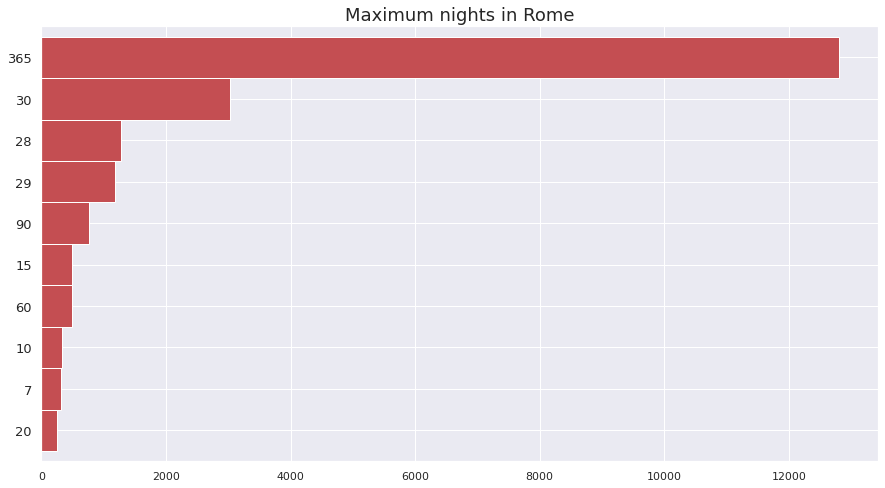

In [ ]:
freq = listings['maximum_nights']. value_counts().head(10).sort_values(ascending=True)

freq.plot.barh(figsize=(15, 8), width=1, color = ["r"])
plt.title('Maximum nights in Rome', fontsize=18)
plt.show()

### 3.2. Propiedades por persona

La legislacion italiana intenta hacer frente al alojamiento profesional, derivado del turismo, obligando a los propietarios a registrarse en una base de datos oficial, haciendoles tributar dependiendo de su actividad económica y propiedades.

Los anfitriones que arriendan tres unidades residenciales o menos entrarán en la categoría de apartamentos turísticos amueblados y no están obligados a declarar impuestos como empresa ni a presentar un SCIA en la mayoría de los casos. Si un anfitrión opera más de 3 propiedades, o un anfitrión ofrece servicios adicionales de valor además del alojamiento, como proporcionar desayuno o solicitar servicios de taxi para los huéspedes, deberá presentar una declaración ante la oficina de ingresos como empresa. 

Esta es la manera de la legislaciónn italiana de intentar hacer frente al alojamiento profesional fuera de los hoteles.

Por el momento, solo el 10.6% de los propietarios tienen mas de tres listados, aunque aglutinan el 39% de estos. 

In [ ]:
freq = listings.groupby(['host_id']).size().reset_index(name='num_host_listings')
host_prop = freq.groupby(['num_host_listings']).size().reset_index(name='count').transpose()
host_prop.columns = host_prop.iloc[0]
host_prop = host_prop.drop(host_prop.index[0])
host_prop

num_host_listings,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,35,37,38,40,43,44,53,58,59,64,102,128,192
count,8488,1688,903,490,253,160,109,63,56,38,30,20,15,12,7,5,4,7,7,4,4,4,2,1,3,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
foo = lambda x: sum(y >= 4 for y in x)

In [ ]:
foo(listings['host_id'].value_counts()) # Propietarios con mas de tres casas
# foo(freq['num_host_listings'])# Propietarios con mas de tres casas

1316

In [ ]:
foo(listings['calculated_host_listings_count']) # casas de grandes propietarios

9338

In [ ]:
(foo(listings['host_id'].value_counts()))/(len(listings['host_id'].value_counts()))*100 # porcentaje de propietarios con mas de 3 casas

10.617184348527632

In [ ]:
pp = (foo(listings['calculated_host_listings_count'])/len(listings['calculated_host_listings_count']))*100 # porcentaje de casas en manos grandes tenedores
py = 100- (foo(listings['calculated_host_listings_count'])/len(listings['calculated_host_listings_count']))*100 

Como podemos observar, los propietarios con mayor cantidad de listados consisten en empresas profesionales dedicadas en exclusiva al alquiler turistico.

In [ ]:
freq = listings.groupby(['host_id', 'host_name', 'host_about']).size().reset_index(name='num_host_listings')
freq = freq.sort_values(by=['num_host_listings'], ascending=False)
freq = freq[freq['num_host_listings'] >= 20]
freq.head()

,host_id,host_name,host_about,num_host_listings
2814,23532561,IFlat,iFlat is a Leading Property Management Company...,192
4575,96122546,CleanBnB Team,Welcome fellow Airbnb travellers to our apartm...,128
5426,201739458,Your.Rentals,At Your.Rentals we provide you with the best s...,102
4156,63191555,Halldis,Beautiful urban apartments around Italy.\nWe a...,64
5547,224869116,Sonder (Rome),6000+ spaces. 35+ cities. We exist to make bet...,59


## 4. Consejos al turismo

## 4.1 Precio medio por barrio

Para comparar el precio medio por barrios solo seleccionaremos el tipo de alojamiento más común, que es el alojamiento para 2 personas. Como era de esperar, el alojamiento en el centro historico de la ciudad es el más caro.

Observamos como la zona del centro historico aglutina tanto la mayor cantidad de listados como el mayor precio medio, al ser esta la zona de mayor demanda turística.

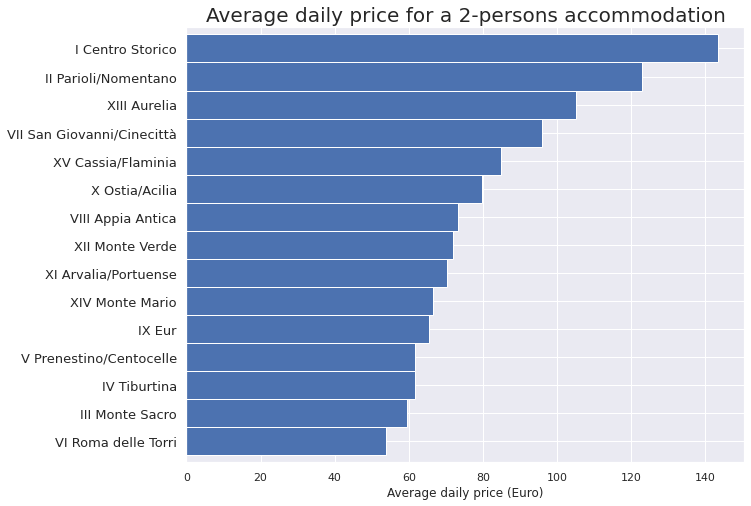

In [ ]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

A continuación puede encontrar los barrios en un mapa. Este mapa es interactivo. Al pasar el cursor sobre los polígonos se muestra el nombre del barrio y el precio medio de los alojamientos para 2 personas.

In [ ]:
adam = gpd.read_file("input/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)



In [ ]:
map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[41.88758298378406, 12.471454167141323], zoom_start=11)
folium.GeoJson(data=adam,
               name='Amsterdam',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

## 4.2 Review de notas de localización y localización vs precios

En esta sección, agrupamos los puntajes de revisión de la ubicación por vecindario (solo listados con al menos 10 revisiones). Aunque esperamos que la distancia al centro de la ciudad sea un factor importante, esta puntuación también debería tener en cuenta otras cosas. Otros factores pueden incluir:

* La seguridad de una ubicación.
* Ruido. Si una lista tiene una ubicación central, pero está rodeada de bares ruidosos, eso debería costar puntos en el puntaje de revisión de la ubicación.
* Si un listado está ubicado fuera del centro de la ciudad pero bien conectado por transporte público, debería obtener puntos de bonificación por eso.
* Instalaciones cercanas al listado. ¿Hay museos, monumentos, supermercados, bares y restaurantes cerca?

A continuación, vemos que los dos vecindarios centrales, Centro Storico y Parioli, que también fueron los más caros, obtienen una puntuación más alta en la revisión de ubicación. Lo cual nos da una muestra de la relación entre esta valoración y la cercanía a las zonas turísticas, al igual que vimos antes ocurría con el precio. Esto ganara relevancía al tener Roma un tráfico de vehiculos tan malo, lo cual hará muy importante el desplazarse a pie.

Pese a todo, llama la atención la poca diferencia en cuanto a estas valoraciones de ubicación entre los barrios mas centricos y los mas alejados, siendo esta diferencia abismal en cuanto al precio. Lo cual nos hará plantearnos si realmente estas diferencias son reales o están condicionadas por algun factor.



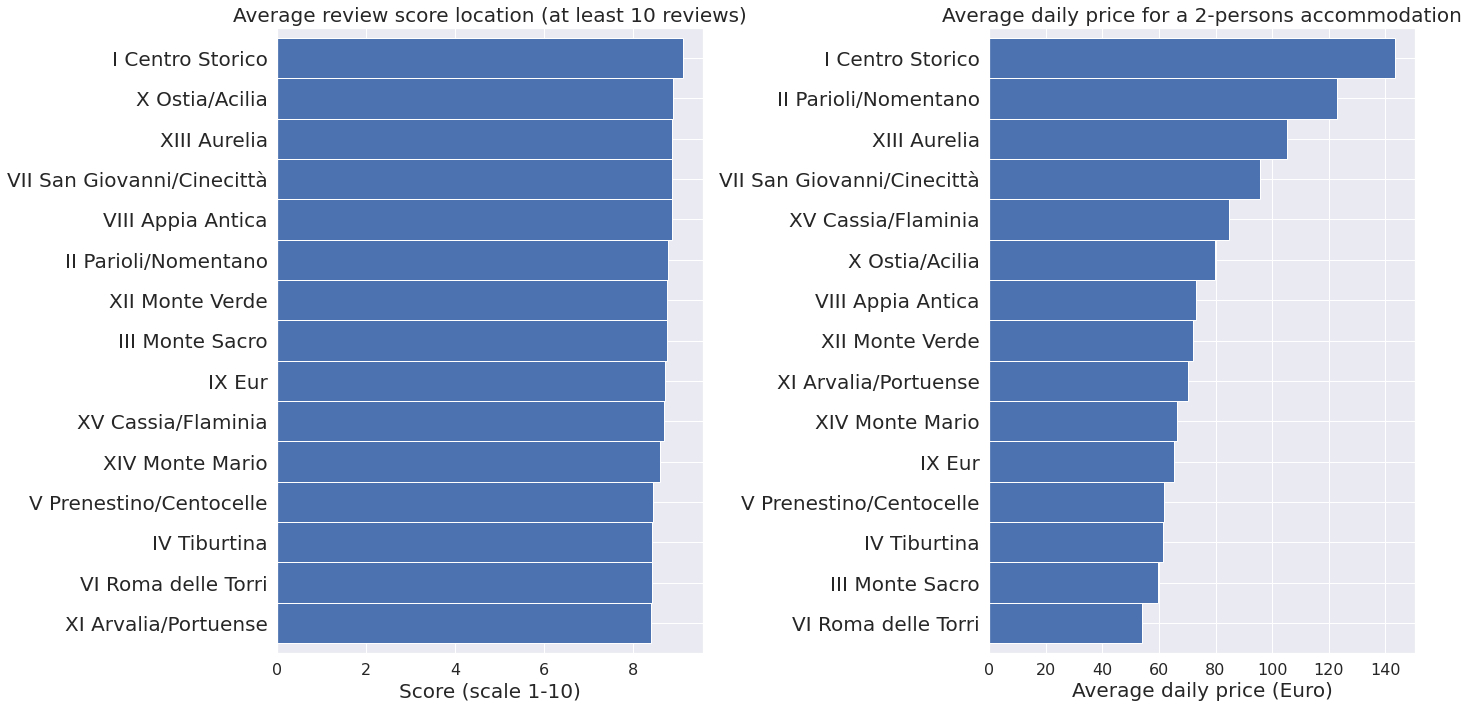

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = listings[listings['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = listings[listings['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

## 4.3 Cómo usar las puntuaciones de las opiniones

Además de las reseñas escritas, los invitados pueden enviar una calificación de estrellas general y un conjunto de calificaciones de estrellas de categoría. Los huéspedes pueden dar calificaciones sobre:

* Experiencia general. ¿Cuál fue su experiencia en general?
* Limpieza. ¿Sentiste que tu espacio estaba limpio y ordenado?
* Precisión. ¿Con qué precisión su página de listado representó su espacio?
* Valor. ¿Sintió que su listado proporcionó un buen valor por el precio?
* Comunicación. ¿Qué tan bien se comunicó con su anfitrión antes y durante su estadía?
* Llegada. ¿Qué tan bien fue su registro?
* Ubicación. ¿Cómo te sentiste en el barrio?

A continuación puede ver la distribución de puntajes de todas esas categorías. ¡Lo que me llamó la atención de inmediato es que las puntuaciones parecen realmente altas en todos los ámbitos!. Está bien explicado en este artículo: [¿Más alta que la calificación promedio? El 95 % de los listados de Airbnb calificaron de 4,5 a 5 estrellas](https://mashable.com/2015/02/25/airbnb-reviews-above-average/?europe=true#1YLfzOC34sqd).

Después de haber visto las distribuciones de puntajes, personalmente consideraría que cualquier puntaje de 8 o inferior no es un buen puntaje.

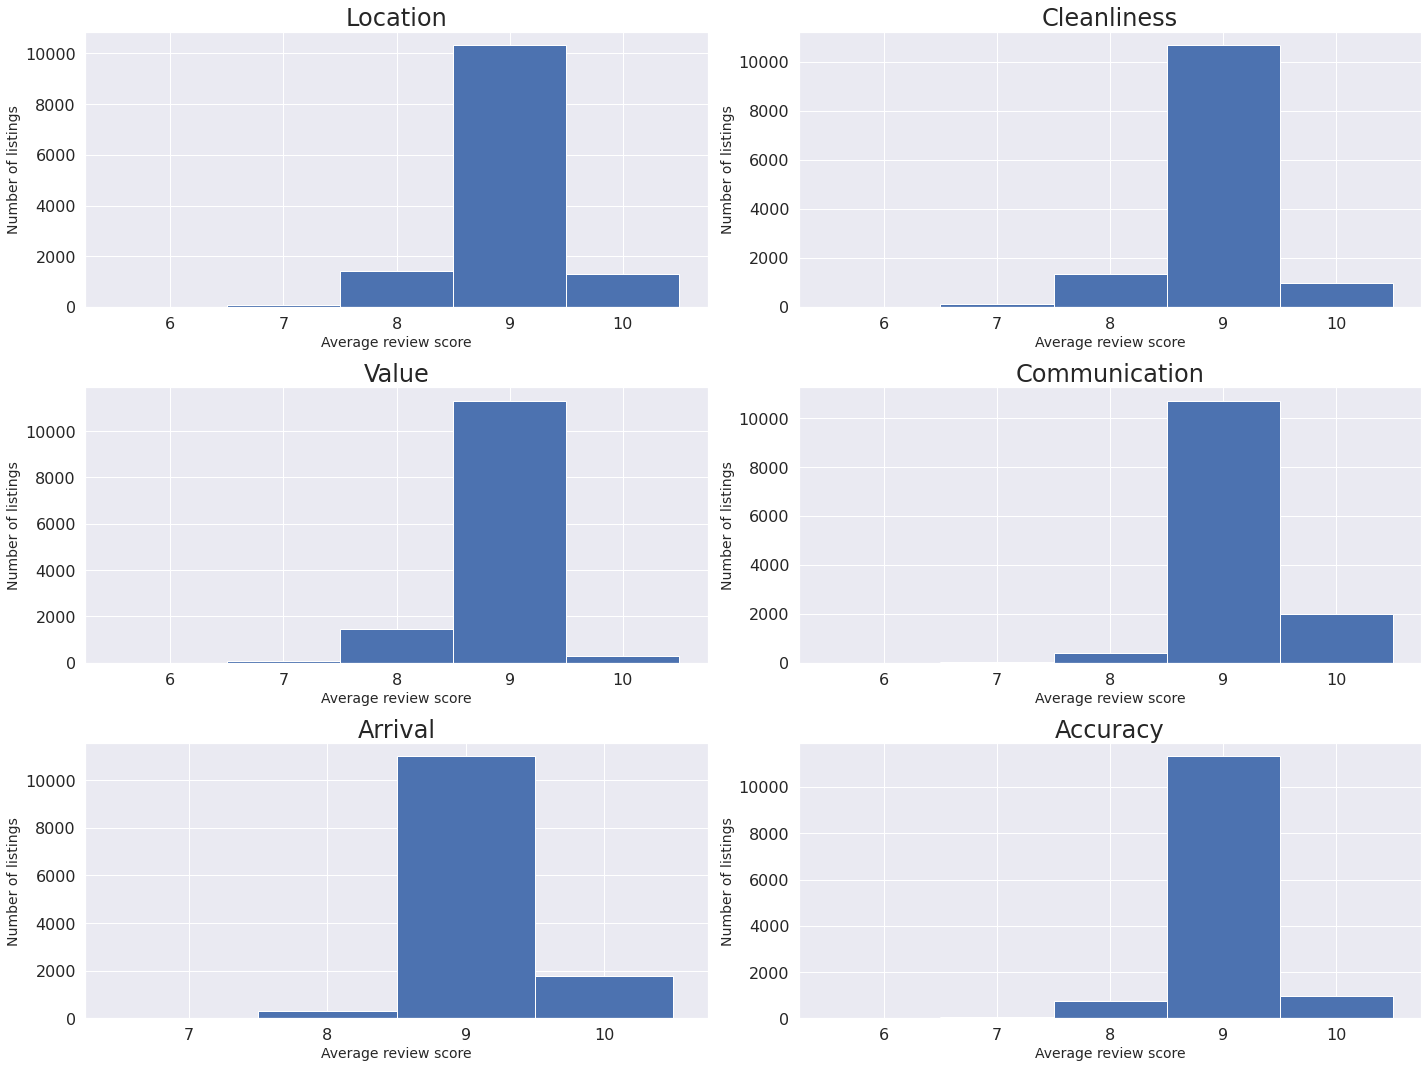

In [ ]:
listings10 = listings[listings['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

## 4.4 Disponibilidad en el tiempo

El archivo de calendario contiene 365 registros para cada listado, lo que significa que para cada listado, el precio y la disponibilidad por fecha se especifican con 365 días de anticipación. 

Tambien hemos 'limitado' que solo nos muestre los datos desde el comienzo del listado el 7 de junio de 2022 hasta el 6 de junio de 2023, para tener solo un año natural.

In [ ]:
calendar['price'] = calendar['price'].str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))
calendar = calendar [calendar.date < '2023-06-06']

In [ ]:
print(calendar.shape)

(8687557, 6)


Nuevamente con respecto a los precios en la siguiente sección, estamos fusionando la variable `accomodate` con el calendario.

In [ ]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")
calendar.sample(15)

,date,available,price,adjusted_price,minimum_nights,maximum_nights,accommodates
listing_id,,,,,,,
43818458,2022-10-30,f,80.0,$80.00,2.0,28.0,5
53857306,2022-08-11,t,189.0,$189.00,2.0,1125.0,4
12776285,2023-03-05,t,184.0,$184.00,3.0,365.0,4
30038535,2023-04-10,t,45.0,$45.00,1.0,1125.0,4
38719733,2023-01-22,t,80.0,$80.00,1.0,1125.0,5
432720,2022-09-09,t,40.0,$40.00,3.0,40.0,2
21854776,2022-07-21,t,209.0,$209.00,2.0,1125.0,6
53778948,2022-12-23,f,110.0,$110.00,3.0,62.0,4
8135719,2022-12-14,t,100.0,$100.00,3.0,1125.0,4


A continuación, vemos que desde la fecha que comienza la gráfica va aumentando la cantidad de listados disponibles hasta noviembre cuando se estabiliza. Esto se puede deber a que la gente espera hasta el último momento para hacer sus reservas buscando mejores precios y al lento reactivamiento del turismo tras el Covid.

Este gráfico es **interactivo** y, al pasar el cursor sobre los puntos, se mostrará una información sobre herramientas con el "número de listados disponibles" y el "día de la semana" por fecha.

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')

sum_available.iplot(y='available', mode = 'lines', xTitle = 'Date', yTitle = 'number of listings available',\
                   text='weekday', title = 'Number of listings available by date')

## 4.5 Precio medio por día

A continuación, verá el precio promedio de todos los alojamientos para 2 personas marcados como disponibles por fecha. El pico del precio promedio de 508 euros fue el 11 de junio y el patrón cíclico se debe a precios más altos en los fines de semana. observamos un pico en fechas señaladas como el 1 de enero. Sin embargo, sospecho que los precios para fechas más lejanas en el tiempo aún no están actualizados y probablemente sean precios predeterminados. Esto podría dar lugar a que el anfitrión no acepte una reserva si se da cuenta de que alguien está intentando reservar algo en una fecha que debería haber sido más cara de lo habitual. Esa gran diferencia se puede deber también a la situación post Covid que hace que el turismo tarde el volver a activarse.

Este gráfico es **interactivo** y, al pasar el cursor sobre los puntos, se mostrará una información sobre herramientas con el precio promedio y el día de la semana por fecha.

In [ ]:
calendar['date'].min()

Timestamp('2022-06-07 00:00:00')

In [ ]:
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby(['date']).mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

average_price.iplot(y='price', mode='lines', xTitle='Date', yTitle='Price',
    text='weekday', title='Average price of available 2 persons accommodation by date')